In [46]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import sklearn as sk
import csv
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [47]:
#scrape the url for the data with BeautifulSoup package
result = requests.get('https://www.mondovo.com/keywords/most-asked-questions-on-google/')
webSource = result.content
soup = bs(webSource,'lxml')
entries = soup.find_all('td')
#store all of the relevent data into an array
#there are 1000 relevent data points however 
#there are some gaps in the data. the 5008 
#is from counting the relevent rows of data 
#in the entries array.
data = []
for elt in range(5008):
    data.append(entries[elt].text)


In [48]:
#remove advertisement space in data
del data[65]
del data[115]
del data[260]


In [49]:
#print data to look at it
print(data[:10])


['Rank', 'Most Asked Questions On Google', 'Global\xa0Monthly Search', '\xa0Global CPC', 'Find Related Keywords for Free', '1', 'what is my ip', '3,350,000', '$0.12', '“what is my ip” related keywords']


In [50]:
#format data to enter into data frame
dfList = []
for entryList in range(0,len(data),5):
    tempList = []
    for dataPoint in range(entryList,entryList+5):
        tempList.append(data[dataPoint])
    dfList.append(tempList)


In [51]:
#print dfList entry to verify format
print(dfList[:2])

[['Rank', 'Most Asked Questions On Google', 'Global\xa0Monthly Search', '\xa0Global CPC', 'Find Related Keywords for Free'], ['1', 'what is my ip', '3,350,000', '$0.12', '“what is my ip” related keywords']]


In [52]:
#enter contents of dfList into data frame
df = pd.DataFrame(dfList[1:], columns = ['Rank','Questions','Global Search','Global CPC','Related Keywords'])

In [53]:
#verify data frame is as expected
print(df.head(2))

  Rank        Questions Global Search Global CPC  \
0    1    what is my ip     3,350,000      $0.12   
1    2  what time is it     1,830,000      $0.99   

                     Related Keywords  
0    “what is my ip” related keywords  
1  “what time is it” related keywords  


In [54]:
##################
#cleaning
##################

#this field was for a url that was not scraped, so dropping
df = df.drop(['Related Keywords'], axis = 1)



In [55]:
#remove '$' from Global CPC(Cost Per Click) field and convert to float
costPerClick = df['Global CPC'].apply(lambda x: float(x.replace('$','')))


#remove ',' from Global Search field and convert to int
globalSearch = df['Global Search'].apply(lambda x: int(x.replace(',','')))


In [56]:
#convert 'Rank' to int
Rank = df['Rank'].apply(lambda x: int(x))

In [57]:
#replace changed fields in data frame
df['Global CPC'] = costPerClick
df['Global Search'] = globalSearch
df['Rank'] = Rank
print(df.head(5))

   Rank                Questions  Global Search  Global CPC
0     1            what is my ip        3350000        0.12
1     2          what time is it        1830000        0.99
2     3  how to register to vote        1220000        2.13
3     4         how to tie a tie         673000        1.62
4     5           can you run it         550000        2.53


In [58]:
#############################################################
#                  making the substring weights
#############################################################

#take out the stop words


#make a count dict of substrings


#determine the weight for each substring and store in a dict
#    minmax(ad_rev)
#    if substring appears more than once add minmax(current)/minmax(init) to minmax(init)


#weights "||ad_rev||" or "normalized ad_rev" = weights*counts for each substring


#make a new data frame with substrings and weights


#add a rank col to the data frame


In [59]:
#############################################################
#                    now for some EDA
#############################################################

<function matplotlib.pyplot.show(*args, **kw)>

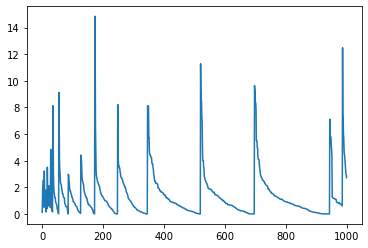

In [60]:
#correlation between CPC and rank?
#by plotting the CPC we have the rank built into the graph already 
#from the graph there is an interesting spiking pattern but there does not 
#seem to be a positive or negative relation for the CPC based on rank. 
# The spikes in the values followed by the exponential decay of the following
#values until the next spike are curious. I wonder if this has to do with the 
#methodology of the data source's ranking system
plt.plot(df['Global CPC'])
plt.show

In [61]:
#what is the avg "ad revenue" (GlobalSearch*CPC)
x = df['Global Search'].values
y = df['Global CPC'].values
df['ad_rev'] = x*y
print(df['ad_rev'].mean())

90501.408


<function matplotlib.pyplot.show(*args, **kw)>

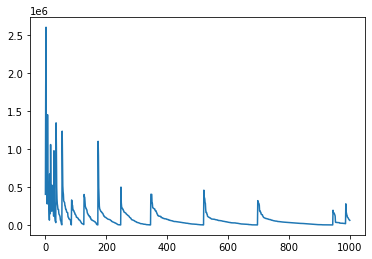

In [63]:
#correlation between rank and "ad revenue"?
#From the graph there is an obvious positive correlation between ad revenue and rank.
#even with the CPC spikes seen before, the shear numbers of the higer ranked questions 
#have produced more ad revenue.
plt.plot(df['ad_rev'])
plt.show

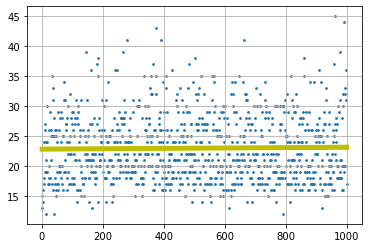

In [68]:
#correlation between question length and rank?
#from the graph of the fitting line, there seems to be no correlation between the 
#length of the question and the rank.

question_len = df['Questions'].apply(lambda x: len(x))

m,b = np.polyfit(df['Rank'],question_len,1)
plt.scatter(df['Rank'],question_len, s = 3)
plt.plot(df['Rank'], m*df['Rank']+b,'y',linewidth = 5)
plt.grid()
plt.show()

In [ ]:
#graph my rank vs normalized ad rev
